In [1]:
from dmba import classificationSummary

no display found. Using non-interactive Agg backend


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
bank_df = pd.read_excel(r'/Users/kensaroven/Desktop/Rotman Resources/RSM 8413 Machine Learning Analytics/Dataset_Class codes/UniversalBank.xlsx', sheet_name = 'Data')

In [4]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1


In [6]:
bank_df.columns = bank_df.columns.strip()

AttributeError: 'Index' object has no attribute 'strip'

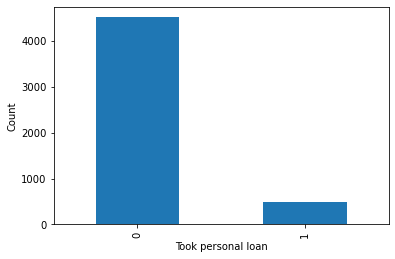

In [43]:
bank_df['Personal Loan'].value_counts().plot(kind = 'bar')
plt.xlabel('Took personal loan')
plt.ylabel('Count')
plt.show()


In [8]:
bank_df.drop(columns = ['ID','ZIP Code'], inplace = True)

In [9]:
X = bank_df.drop(columns = ['Personal Loan'])

In [10]:
y = bank_df['Personal Loan']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 1)

In [12]:
fullClassTree = DecisionTreeClassifier(random_state = 1)

In [13]:
fullClassTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [14]:
y_predicted = fullClassTree.predict(X_test)

In [15]:
fullClassTree.score(X_test, y_test)

0.953

In [16]:
accuracy_score(y_test, y_predicted)

0.953

In [17]:
classificationSummary(y_train, fullClassTree.predict(X_train))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287


In [18]:
fullClassTree.tree_.max_depth

22

In [19]:
fullClassTree.tree_.node_count

265

In [20]:
fullClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [21]:
export_graphviz(fullClassTree, out_file = 'fullClassTree.dot', feature_names = X_train.columns)

In [22]:
smallClassTree = DecisionTreeClassifier(max_depth=2, min_samples_split=100, random_state=1)

In [23]:
smallClassTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=100, random_state=1)

In [24]:
smallClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [25]:
smallClassTree.tree_.max_depth

2

In [26]:
smallClassTree.tree_.node_count

7

In [27]:
export_graphviz(smallClassTree, out_file = 'smallClassTree.dot', feature_names = X_train.columns)

In [28]:
classificationSummary(y_train, smallClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.9463)

       Prediction
Actual    0    1
     0 2698   15
     1  146  141


In [29]:
classificationSummary(y_test, smallClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.9445)

       Prediction
Actual    0    1
     0 1799    8
     1  103   90


In [30]:
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

In [31]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state = 1), param_grid, cv=5, n_jobs = -1)

In [32]:
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80,
                                               90, 100]})

In [33]:
print("Initial score:", gridSearch.best_score_)

Initial score: 0.9503333333333333


In [34]:
print("Initial parameters:", gridSearch.best_params_)

Initial parameters: {'max_depth': 10, 'min_samples_split': 50}


In [35]:
param_grid = {
    'max_depth': list(range(2,16)),
    'min_samples_split' : list(range(30,69))
}

In [36]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state = 1), param_grid, cv=5, n_jobs = -1)

In [37]:
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'min_samples_split': [30, 31, 32, 33, 34, 35, 36, 37,
                                               38, 39, 40, 41, 42, 43, 44, 45,
                                               46, 47, 48, 49, 50, 51, 52, 53,
                                               54, 55, 56, 57, 58, 59, ...]})

In [38]:
print("Imporoved parameters:", gridSearch.best_params_)

Imporoved parameters: {'max_depth': 4, 'min_samples_split': 39}


In [39]:
bestClassTree = gridSearch.best_estimator_

In [40]:
classificationSummary(y_train, smallClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.9463)

       Prediction
Actual    0    1
     0 2698   15
     1  146  141


In [41]:
classificationSummary(y_test, bestClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.9540)

       Prediction
Actual    0    1
     0 1802    5
     1   87  106
